# Questions
1. Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
2. Explain why that might be happening. Are the localized translations really worse?
3. If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [163]:
df_test = pd.read_csv('D:/DATA_SCIENCE/Dataset/Take_home_challenge/2_Translation_Test/test_table.csv')
df_test.shape

(453321, 9)

In [164]:
df_user = pd.read_csv('D:/DATA_SCIENCE/Dataset/Take_home_challenge/2_Translation_Test/user_table.csv')
df_user.shape

(452867, 4)

In [165]:
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [167]:
df_test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [168]:
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [169]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [170]:
df_user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [171]:
# Check for duplicates
print('Test ID unique: ', df_test['user_id'].nunique()==df_test.shape[0])
print('User ID unique: ', df_user['user_id'].nunique()==df_user.shape[0])

Test ID unique:  True
User ID unique:  True


In [172]:
# Merge the two tables
df = pd.merge(df_test, df_user, on='user_id', how='left')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


# A/B Testing

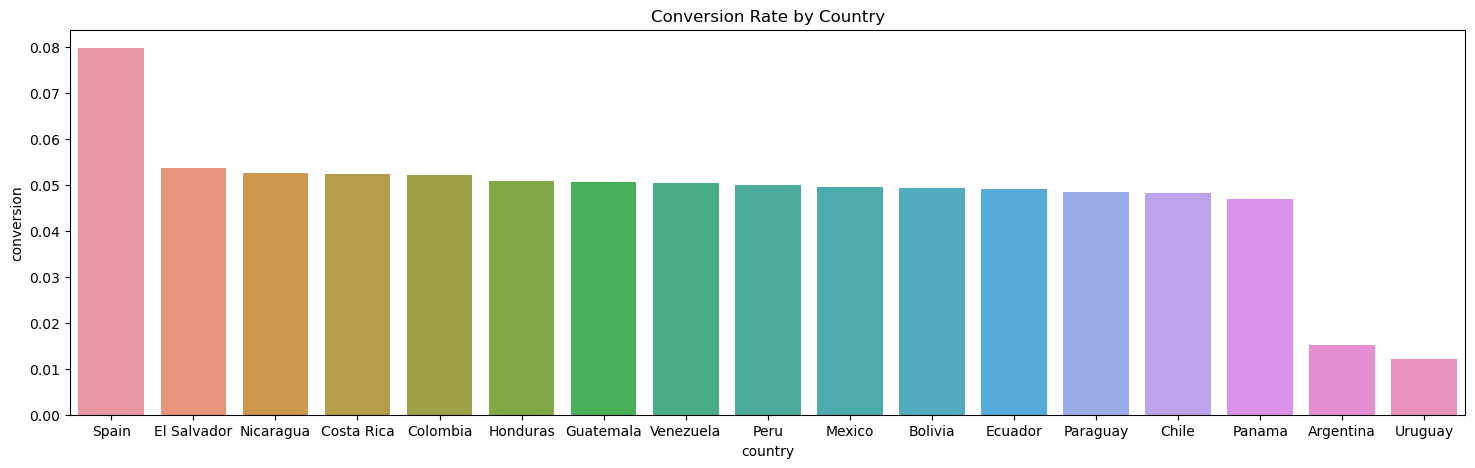

In [174]:
# check is it True that Spain converted more than the rest of LatAm countries?
group_country = df[df['test']==0].groupby('country')['conversion'].mean().sort_values(ascending=False)
group_country = pd.DataFrame(group_country)
group_country = group_country.reset_index()
#visualization 
plt.figure(figsize=(18,5))
sns.barplot(x='country', y='conversion', data=group_country)
plt.title('Conversion Rate by Country')
plt.show()

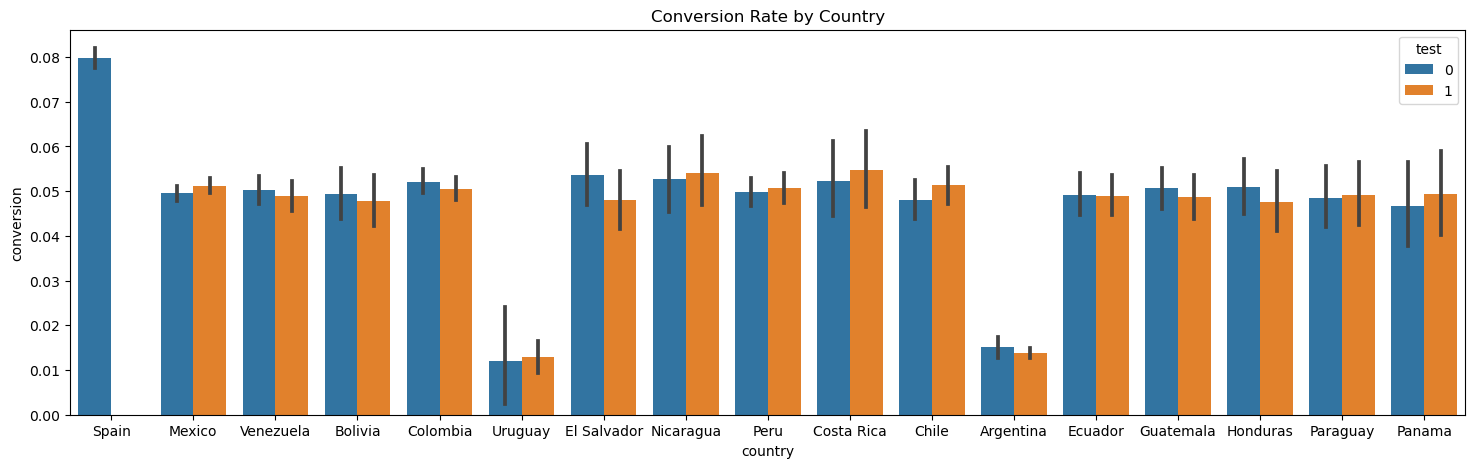

In [175]:
# check the conversion rate by country in control and test group
plt.figure(figsize=(18,5))
sns.barplot(x='country', y='conversion', hue='test', data=df)
plt.title('Conversion Rate by Country')
plt.show()


In [176]:
# t-test
from scipy import stats
# test vs. control
df_2 = df[df['country']!='Spain']
test = df_2[df_2['test']==1]['conversion']
control = df_2[df_2['test']==0]['conversion']

# conduct 2 sample t-test (compare the mean of two independent groups)
t_stat, p_val = stats.ttest_ind(test, control)
print('t-statistic: ', t_stat)
print('p-value: ', p_val)


t-statistic:  -7.422512095954769
p-value:  1.15144687852198e-13


Based on the t-test statistic -7.42 and very small p-value of 1.15e-13, we can reject the null hypothesis and accept the alternative hypothesis that the non-localized version of the site performs better than the localized versions. 

In [177]:
# comparing the mean 
print('Test mean: ', test.mean())
print('Control mean: ', control.mean())

Test mean:  0.043424713982118966
Control mean:  0.04833042316066309


Comparing the mean conversion rate of the test and control groups, users in the control are converting at 4.8% while users in the test just at 4.3%. That’s a 10% drop, which would be dramatic if it were true. The reasons that might result in the unexpected A/B test are:
- Sampling Bias: The users in the test and control groups may not be representative of the overall user population, which can lead to biased results.
- Insufficient Test Duration: A/B tests need to be run for a sufficient duration to ensure that there is enough data to make reliable conclusions. If the test duration is too short, the results may not be accurate.
- Insufficient Data Collected: A/B testing requires a large enough sample size to ensure that the results are statistically significant and reliable. If the sample size is too small, the test may not have enough statistical power to detect meaningful differences in the conversion rates.

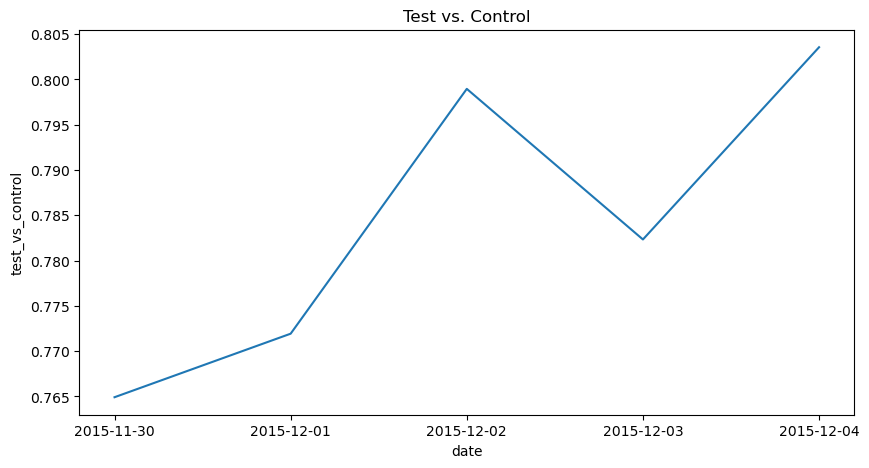

In [178]:
# check the conversion rate by date in control and test group
df_date = df.groupby(['date', 'test'])['conversion'].mean().reset_index()
test_vs_control = df_date.groupby('date')['conversion'].apply(lambda x: x.iloc[1]/x.iloc[0]).reset_index()
test_vs_control.columns = ['date', 'test_vs_control']
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='test_vs_control', data=test_vs_control)
plt.title('Test vs. Control')
plt.show()

In [179]:
# sample collected across days
df_2.groupby(['date', 'test']).size()


date        test
2015-11-30  0       29020
            1       33883
2015-12-01  0       29036
            1       33875
2015-12-02  0       28939
            1       33549
2015-12-03  0       40784
            1       47420
2015-12-04  0       57777
            1       67256
dtype: int64

1. Test has constantly been worse thant control, and there is relatively little variance across days. That probably means that we do have enough data, but there was some bias (such as segment of users) in the experiment set up. 
2. We just ran it for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.

In [180]:
# check the statistical power of the test
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
effect = 0.02
alpha = 0.05
power = 0.8
ratio = 1
# calculate the necessary sample size
sample_size = tt_ind_solve_power(effect_size=effect, alpha=alpha, power=power, ratio=1)
print('Sample size: ', sample_size)

Sample size:  39245.263510769844


# Check the split ratio of test/control group across segment

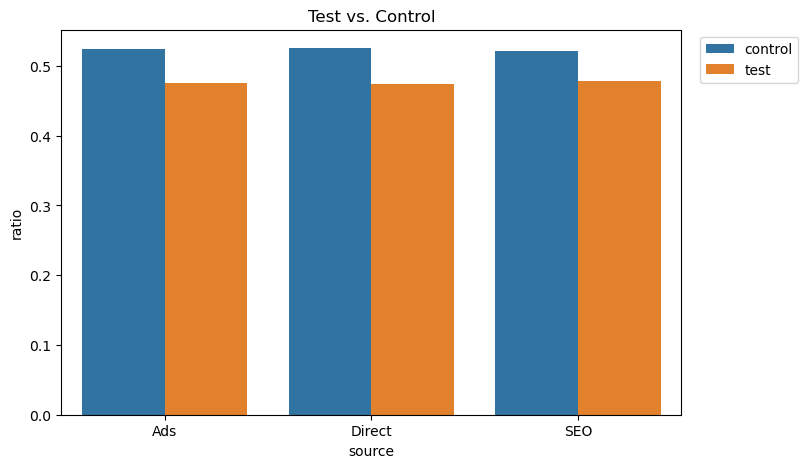

In [181]:
# check the split ratio of test and control group across source
source = df.groupby(['source', 'test']).size()/df.groupby('source').size()
source = pd.DataFrame(source)
source = source.reset_index()
source.columns = ['source', 'test', 'ratio']
source['test'] = source['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='source', y='ratio', hue='test', data=source)
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()  

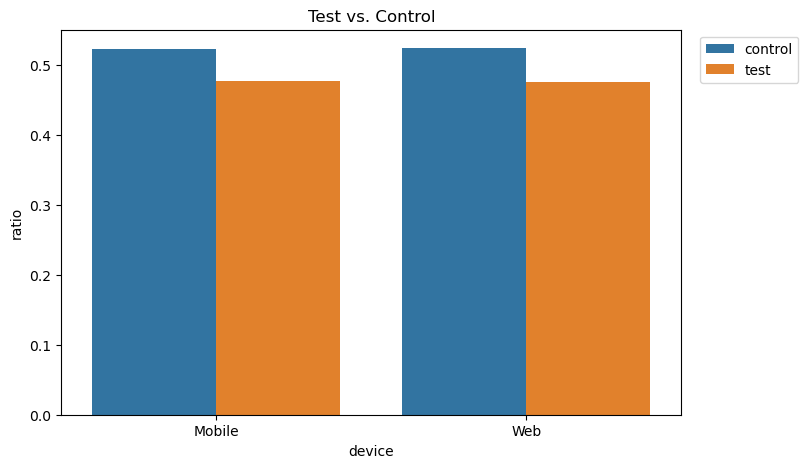

In [182]:
# check the split ratio of test and control group across device
device = df.groupby(['device', 'test']).size()/df.groupby('device').size()
device = pd.DataFrame(device)
device = device.reset_index()
device.columns = ['device', 'test', 'ratio']
device['test'] = device['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='device', y='ratio', hue='test', data=device)
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

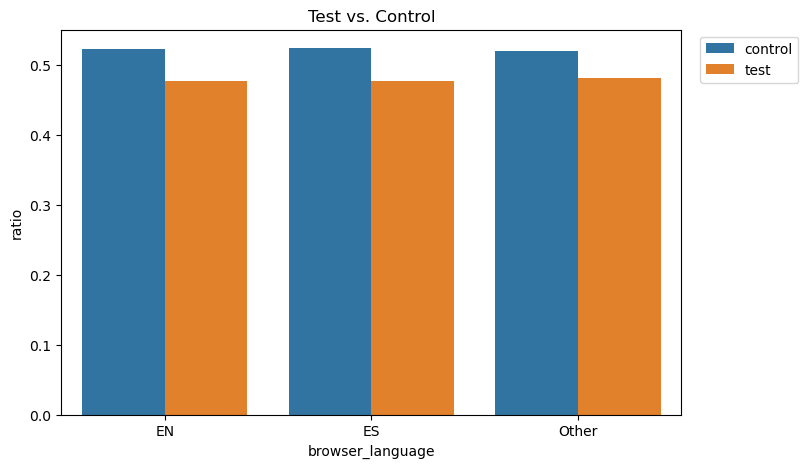

In [183]:
# check split ratio across browser_language
browser_language = df.groupby(['browser_language', 'test']).size()/df.groupby('browser_language').size()
browser_language = pd.DataFrame(browser_language)
browser_language = browser_language.reset_index()
browser_language.columns = ['browser_language', 'test', 'ratio']
browser_language['test'] = browser_language['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='browser_language', y='ratio', hue='test', data=browser_language)
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

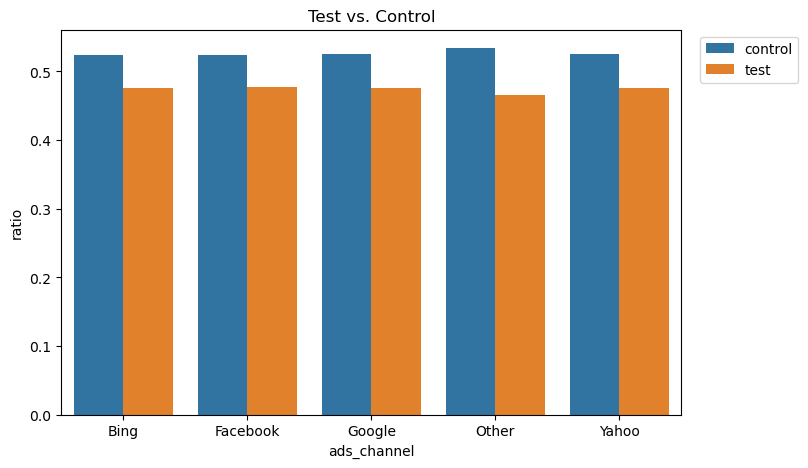

In [184]:
# check split ratio across ads_channel
ads_channel = df.groupby(['ads_channel', 'test']).size()/df.groupby('ads_channel').size()
ads_channel = pd.DataFrame(ads_channel)
ads_channel = ads_channel.reset_index()
ads_channel.columns = ['ads_channel', 'test', 'ratio']
ads_channel['test'] = ads_channel['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='ads_channel', y='ratio', hue='test', data=ads_channel)
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  
plt.show()

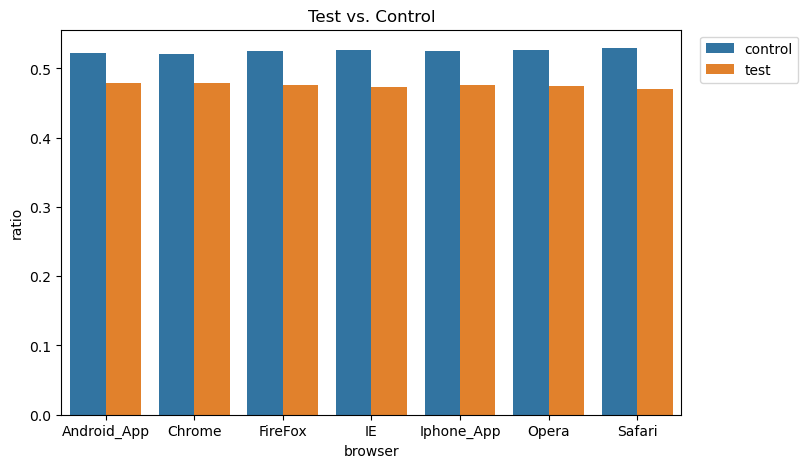

In [185]:
# check split ratio across browser
browser = df.groupby(['browser', 'test']).size()/df.groupby('browser').size()
browser = pd.DataFrame(browser)
browser = browser.reset_index()
browser.columns = ['browser', 'test', 'ratio']
browser['test'] = browser['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='browser', y='ratio', hue='test', data=browser)
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

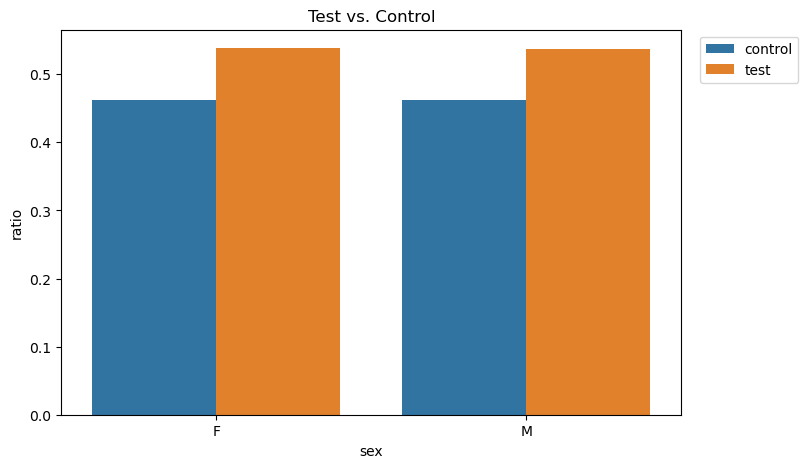

In [186]:
# check split ratio across user sex
sex = df_2.groupby(['sex', 'test']).size()/df_2.groupby(['sex']).size()
sex = pd.DataFrame(sex)
sex = sex.reset_index()
sex.columns = ['sex', 'test', 'ratio']
sex['test'] = sex['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(8,5))
sns.barplot(x='sex', y='ratio', data=sex, hue='test')
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

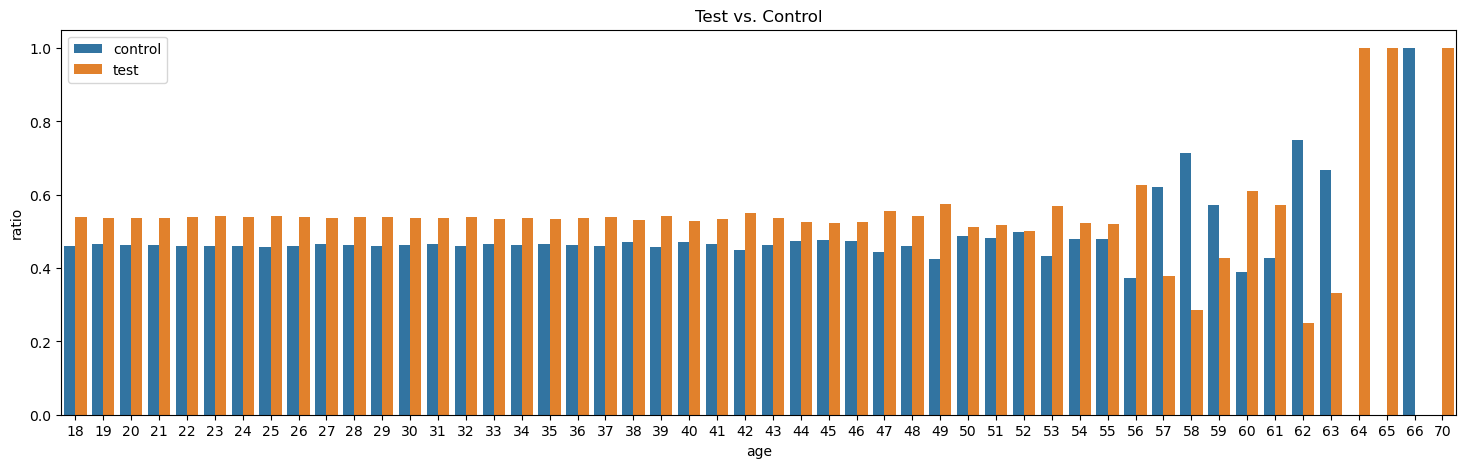

In [187]:
# check split ratio across user age
age = df_2.groupby(['age', 'test']).size()/df_2.groupby(['age']).size()
age = pd.DataFrame(age)
age = age.reset_index()
age.columns = ['age', 'test', 'ratio']
age['test'] = age['test'].map({0:'control', 1:'test'})
age['age'] = age['age'].astype(int)
plt.figure(figsize=(18,5))
sns.barplot(x='age', y='ratio', data=age, hue='test')
plt.title('Test vs. Control')
plt.legend(loc='upper left')
plt.show()


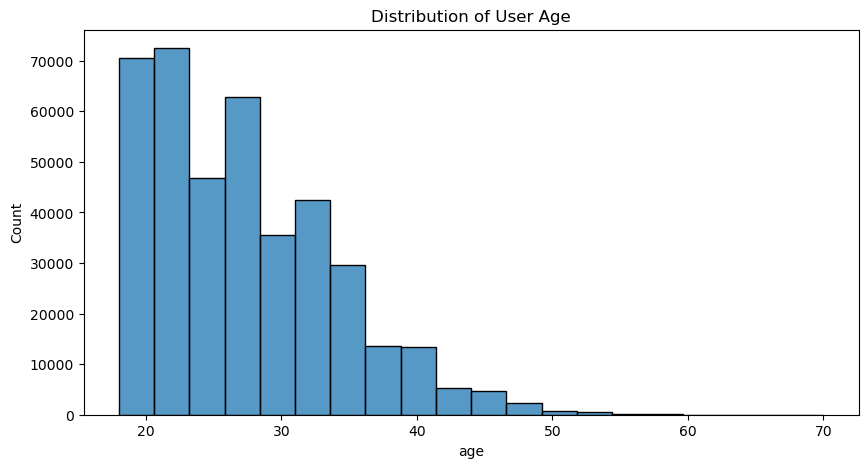

Age over 50:  0.29 %


In [188]:
# distribution of user age
plt.figure(figsize=(10,5))
sns.histplot(df_2['age'], bins=20)
plt.title('Distribution of User Age')
plt.show()
print('Age over 50: ', round(df_2[df_2['age'] > 50].shape[0]/df_2.shape[0]*100,2), '%')

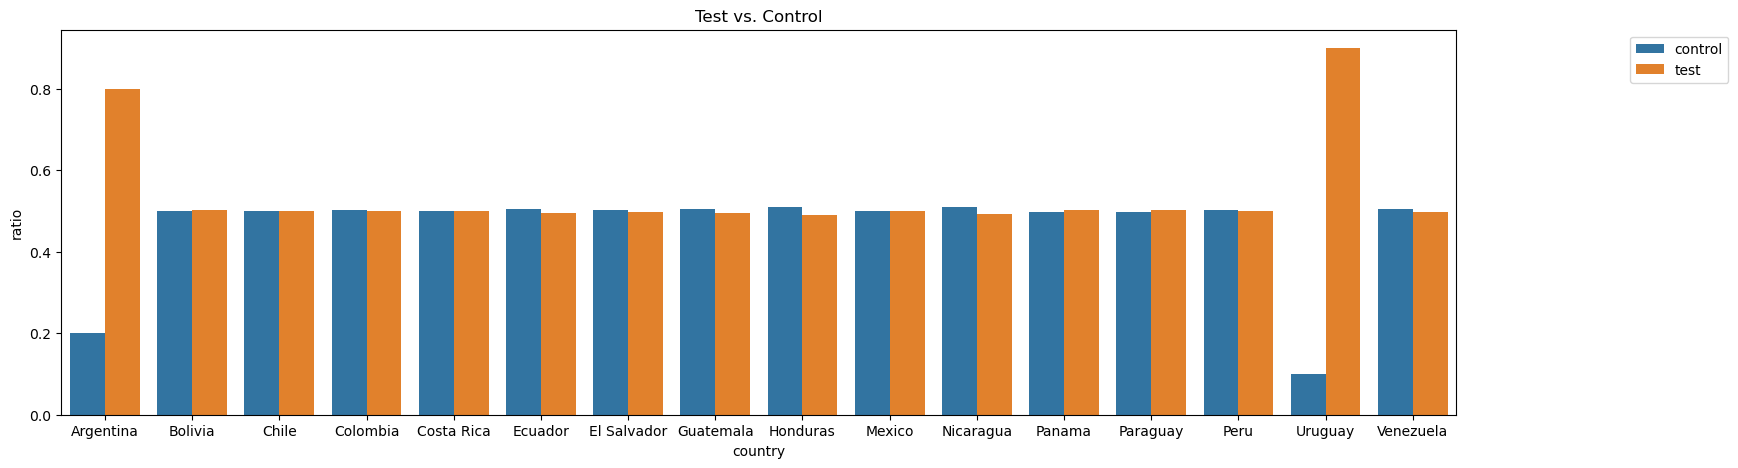

In [189]:
# check split ratio across user country
country = df_2.groupby(['country', 'test']).size()/df_2.groupby(['country']).size()
country = pd.DataFrame(country)
country = country.reset_index()
country.columns = ['country', 'test', 'ratio']
country['test'] = country['test'].map({0:'control', 1:'test'})
plt.figure(figsize=(18,5))
sns.barplot(x='country', y='ratio', data=country, hue='test')
plt.title('Test vs. Control')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


In this part, we will see that the selection is not the same by country and age distribution. In details, for Argentina and Uruguay, 80% of the users were part of the test group.
Thus, there is a clear selection bias here which lead to the incorrect conclusions by the team. Now, let’s check the test results after controlling for country to correct for the bias that over/under-represented countries in each of the experiment groups have.

In [191]:
# t-test for test and control group of each country
grouped = df_2.groupby('country').agg(
    test_mean_conversion = ('conversion', lambda x: x[df_2['test']==1].mean()),
    control_mean_conversion = ('conversion', lambda x: x[df_2['test']==0].mean()),
    p_value = ('conversion', lambda x: stats.ttest_ind(x[df_2['test']==1], x[df_2['test']==0], equal_var=False)[1])
)
grouped

,test_mean_conversion,control_mean_conversion,p_value
country,,,
Argentina,0.013725,0.015071,0.335147
Bolivia,0.047901,0.049369,0.718885
Chile,0.051295,0.048107,0.302848
Colombia,0.050571,0.052089,0.423719
Costa Rica,0.054738,0.052256,0.687876
Ecuador,0.048988,0.049154,0.961512
El Salvador,0.047947,0.053554,0.248127
Guatemala,0.048647,0.050643,0.572107
Honduras,0.047540,0.050906,0.471463


# Conclusion
After controlling for country, the test clearly appears non significant with p -value> 0.05 threshold.

In conclusion, given the fact of bias selection, we cannot give the conclusion about the difference between the two versions and that a localized translation did not make things worse as the team concluded. But at least we know that the localized translation didn't make things worse!!!

In order to make better experiment, the company should find the reason why find the reason why users have different representation ratio in Argentina and Uruguay, then run the experiment again.